<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 10.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [21]:
# insert code here
import numpy as np
import pandas as pd

%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical


### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [22]:
# insert code here
diabetes_df = pd.read_csv("diabetes.csv")

In [23]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
648,11,136,84,35,130,28.3,0.260,42,1
671,1,99,58,10,0,25.4,0.551,21,0
336,0,117,0,0,0,33.8,0.932,44,0
705,6,80,80,36,0,39.8,0.177,28,0
227,3,162,52,38,0,37.2,0.652,24,1


### Prepare input data

In [24]:
# insert code here
x = diabetes_df.iloc[:, :-1].values

from sklearn.preprocessing import scale
x=scale(x)

In [25]:
y = diabetes_df["Outcome"]

### Split the data (training/test)

In [26]:
# insert code here
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,random_state=0)

### Create the model's architecture

In [27]:
# insert code here
model = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation="relu", input_shape=(8,)),  
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

### Compile the model

In [28]:
# insert code here
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr=0.0022), 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

### Fit the training data

In [29]:
%%time
# insert code here
history = model.fit(xtrain, 
                    ytrain,
                   epochs =500,batch_size=40,validation_data=(xtest,ytest))

Epoch 1/500
12/12 [==============================] - 0s 20ms/step - loss: 0.7819 - accuracy: 0.3630 - val_loss: 0.7440 - val_accuracy: 0.3864
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.7074 - accuracy: 0.4848 - val_loss: 0.6828 - val_accuracy: 0.6006
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6590 - accuracy: 0.6283 - val_loss: 0.6365 - val_accuracy: 0.6818
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.6870 - val_loss: 0.6002 - val_accuracy: 0.7110
Epoch 5/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5897 - accuracy: 0.7022 - val_loss: 0.5695 - val_accuracy: 0.7273
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5597 - accuracy: 0.7326 - val_loss: 0.5437 - val_accuracy: 0.7338
Epoch 7/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5344 - accuracy: 0.7370 - val_loss: 0.5238 - val_accuracy: 0.7468
Epoch 8/500


Epoch 59/500
12/12 [==============================] - 0s 6ms/step - loss: 0.3993 - accuracy: 0.8174 - val_loss: 0.4635 - val_accuracy: 0.7825
Epoch 60/500
12/12 [==============================] - 0s 5ms/step - loss: 0.3978 - accuracy: 0.8217 - val_loss: 0.4652 - val_accuracy: 0.7760
Epoch 61/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3973 - accuracy: 0.8152 - val_loss: 0.4659 - val_accuracy: 0.7792
Epoch 62/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3965 - accuracy: 0.8152 - val_loss: 0.4653 - val_accuracy: 0.7825
Epoch 63/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8217 - val_loss: 0.4663 - val_accuracy: 0.7857
Epoch 64/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3956 - accuracy: 0.8174 - val_loss: 0.4650 - val_accuracy: 0.7857
Epoch 65/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.8174 - val_loss: 0.4678 - val_accuracy: 0.7792
Epoch 

12/12 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.8543 - val_loss: 0.4946 - val_accuracy: 0.7857
Epoch 117/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.8522 - val_loss: 0.4947 - val_accuracy: 0.7922
Epoch 118/500
12/12 [==============================] - 0s 6ms/step - loss: 0.3529 - accuracy: 0.8565 - val_loss: 0.4935 - val_accuracy: 0.7890
Epoch 119/500
12/12 [==============================] - 0s 10ms/step - loss: 0.3515 - accuracy: 0.8609 - val_loss: 0.4951 - val_accuracy: 0.7890
Epoch 120/500
12/12 [==============================] - 0s 7ms/step - loss: 0.3515 - accuracy: 0.8609 - val_loss: 0.4963 - val_accuracy: 0.7857
Epoch 121/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.8609 - val_loss: 0.4943 - val_accuracy: 0.7890
Epoch 122/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3498 - accuracy: 0.8587 - val_loss: 0.4942 - val_accuracy: 0.7857
Epoch 123/50

12/12 [==============================] - 0s 4ms/step - loss: 0.3063 - accuracy: 0.8891 - val_loss: 0.5352 - val_accuracy: 0.7760
Epoch 174/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3057 - accuracy: 0.8891 - val_loss: 0.5389 - val_accuracy: 0.7760
Epoch 175/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3039 - accuracy: 0.8891 - val_loss: 0.5395 - val_accuracy: 0.7695
Epoch 176/500
12/12 [==============================] - 0s 6ms/step - loss: 0.3039 - accuracy: 0.8913 - val_loss: 0.5408 - val_accuracy: 0.7760
Epoch 177/500
12/12 [==============================] - 0s 8ms/step - loss: 0.3038 - accuracy: 0.8870 - val_loss: 0.5389 - val_accuracy: 0.7662
Epoch 178/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3043 - accuracy: 0.8870 - val_loss: 0.5432 - val_accuracy: 0.7760
Epoch 179/500
12/12 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.8891 - val_loss: 0.5445 - val_accuracy: 0.7760
Epoch 180/500

12/12 [==============================] - 0s 4ms/step - loss: 0.2777 - accuracy: 0.9043 - val_loss: 0.5779 - val_accuracy: 0.7597
Epoch 231/500
12/12 [==============================] - 0s 12ms/step - loss: 0.2757 - accuracy: 0.8978 - val_loss: 0.5757 - val_accuracy: 0.7435
Epoch 232/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.8957 - val_loss: 0.5775 - val_accuracy: 0.7468
Epoch 233/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2786 - accuracy: 0.9000 - val_loss: 0.5850 - val_accuracy: 0.7662
Epoch 234/500
12/12 [==============================] - 0s 8ms/step - loss: 0.2753 - accuracy: 0.9022 - val_loss: 0.5773 - val_accuracy: 0.7532
Epoch 235/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2755 - accuracy: 0.8978 - val_loss: 0.5797 - val_accuracy: 0.7597
Epoch 236/500
12/12 [==============================] - 0s 9ms/step - loss: 0.2738 - accuracy: 0.9022 - val_loss: 0.5831 - val_accuracy: 0.7468
Epoch 237/50

12/12 [==============================] - 0s 6ms/step - loss: 0.2536 - accuracy: 0.9087 - val_loss: 0.6103 - val_accuracy: 0.7597
Epoch 288/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.9109 - val_loss: 0.6073 - val_accuracy: 0.7500
Epoch 289/500
12/12 [==============================] - 0s 11ms/step - loss: 0.2524 - accuracy: 0.9130 - val_loss: 0.6096 - val_accuracy: 0.7565
Epoch 290/500
12/12 [==============================] - 0s 9ms/step - loss: 0.2507 - accuracy: 0.9130 - val_loss: 0.6086 - val_accuracy: 0.7532
Epoch 291/500
12/12 [==============================] - 0s 14ms/step - loss: 0.2510 - accuracy: 0.9196 - val_loss: 0.6069 - val_accuracy: 0.7597
Epoch 292/500
12/12 [==============================] - 0s 10ms/step - loss: 0.2511 - accuracy: 0.9109 - val_loss: 0.6116 - val_accuracy: 0.7597
Epoch 293/500
12/12 [==============================] - 0s 14ms/step - loss: 0.2513 - accuracy: 0.9130 - val_loss: 0.6060 - val_accuracy: 0.7565
Epoch 294

12/12 [==============================] - 0s 7ms/step - loss: 0.2330 - accuracy: 0.9217 - val_loss: 0.6458 - val_accuracy: 0.7597
Epoch 345/500
12/12 [==============================] - 0s 16ms/step - loss: 0.2336 - accuracy: 0.9174 - val_loss: 0.6475 - val_accuracy: 0.7565
Epoch 346/500
12/12 [==============================] - 0s 6ms/step - loss: 0.2335 - accuracy: 0.9196 - val_loss: 0.6486 - val_accuracy: 0.7630
Epoch 347/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9239 - val_loss: 0.6499 - val_accuracy: 0.7565
Epoch 348/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2315 - accuracy: 0.9217 - val_loss: 0.6525 - val_accuracy: 0.7597
Epoch 349/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2324 - accuracy: 0.9174 - val_loss: 0.6528 - val_accuracy: 0.7468
Epoch 350/500
12/12 [==============================] - 0s 6ms/step - loss: 0.2312 - accuracy: 0.9239 - val_loss: 0.6522 - val_accuracy: 0.7500
Epoch 351/50

12/12 [==============================] - 0s 7ms/step - loss: 0.2128 - accuracy: 0.9304 - val_loss: 0.6981 - val_accuracy: 0.7403
Epoch 402/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2123 - accuracy: 0.9283 - val_loss: 0.7028 - val_accuracy: 0.7338
Epoch 403/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2122 - accuracy: 0.9283 - val_loss: 0.7035 - val_accuracy: 0.7403
Epoch 404/500
12/12 [==============================] - 0s 6ms/step - loss: 0.2120 - accuracy: 0.9283 - val_loss: 0.7009 - val_accuracy: 0.7403
Epoch 405/500
12/12 [==============================] - 0s 7ms/step - loss: 0.2107 - accuracy: 0.9283 - val_loss: 0.7029 - val_accuracy: 0.7435
Epoch 406/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2105 - accuracy: 0.9261 - val_loss: 0.7074 - val_accuracy: 0.7403
Epoch 407/500
12/12 [==============================] - 0s 4ms/step - loss: 0.2115 - accuracy: 0.9217 - val_loss: 0.7045 - val_accuracy: 0.7500
Epoch 408/500

12/12 [==============================] - 0s 4ms/step - loss: 0.1904 - accuracy: 0.9370 - val_loss: 0.7747 - val_accuracy: 0.7468
Epoch 459/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1953 - accuracy: 0.9304 - val_loss: 0.7814 - val_accuracy: 0.7370
Epoch 460/500
12/12 [==============================] - 0s 6ms/step - loss: 0.1920 - accuracy: 0.9348 - val_loss: 0.7727 - val_accuracy: 0.7435
Epoch 461/500
12/12 [==============================] - 0s 7ms/step - loss: 0.1901 - accuracy: 0.9348 - val_loss: 0.7763 - val_accuracy: 0.7403
Epoch 462/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1915 - accuracy: 0.9370 - val_loss: 0.7820 - val_accuracy: 0.7435
Epoch 463/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1901 - accuracy: 0.9391 - val_loss: 0.7780 - val_accuracy: 0.7500
Epoch 464/500
12/12 [==============================] - 0s 4ms/step - loss: 0.1921 - accuracy: 0.9370 - val_loss: 0.7783 - val_accuracy: 0.7468
Epoch 465/500

### Create predictions

In [30]:
# insert code here
acc=model.evaluate(xtest,ytest)
print(acc)

10/10 [==============================] - 0s 2ms/step - loss: 0.8324 - accuracy: 0.7435
[0.8324325084686279, 0.7435064911842346]


### Evaluate the model

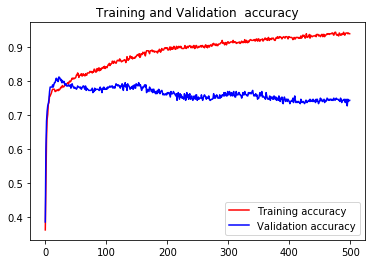

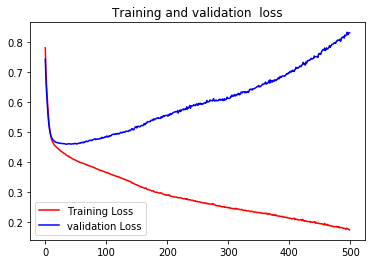

In [31]:
# insert code here
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss =  history.history['loss']
val_acc=history.history["val_accuracy"]
val_loss=history.history["val_loss"]
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation  accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and validation  loss')
plt.legend()

plt.show()

In [33]:
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation="relu", input_shape=(8,)),  
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model1.compile(optimizer =tf.keras.optimizers.SGD(
    learning_rate=0.1), 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

In [34]:
acc=model1.evaluate(xtest,ytest)
print(acc)

10/10 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5844
[0.6842342615127563, 0.5844155550003052]


### Visualisation of cost

In [32]:
# insert code here


### Visualisation of residuals

In [ ]:
# insert code here

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



